In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!cp -r /content/drive/MyDrive/IITDH/mds/pa2 ./

In [10]:
%cd /content/pa2
!ls

/content/pa2
A_inv.npy  create_data_for_assignment.py       incomplete.png  y.npy
C.npy	   CS427_Programming_Assignment_2.pdf  problem3.ipynb


In [11]:
import os
import numpy as np
import numpy.linalg as LA

In [12]:
y = np.load('y.npy').reshape(-1)
C = np.load('C.npy')
A_inv = np.load('A_inv.npy')
A_inv.shape, C.shape, y.shape

((10000, 10000), (3000, 10000), (3000,))

In [13]:
def objective_func(s):
    return LA.norm(s, ord=1)

def constraint_func(s):
    a = (y - np.matmul(C, s)).T
    return np.inner(a, a)[0, 0]

In [14]:
import cvxpy as cp
import numpy as np

# Problem data.

# Construct the problem.
x = cp.Variable(shape=10000)
objective = cp.Minimize(cp.norm(x, 1))
# constraints = [cp.norm(y - C*x, 2)]
constraints = [C*x - y == 0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve(verbose=True, solver=cp.OSQP)
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 20000, constraints m = 23000
          nnz(P) + nnz(A) = 29586496
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -8.0000e+04   2.33e+02   1.23e+09   1.00e-01   1.05e+02s
 200   9.2853e+04   9.28e-01   3.38e-01   1.00e-01   1.31e+02s
 400   9.2259e+04   9.71e-02   1.27e

In [16]:
solution = x.value
solution = solution.reshape(-1, 1)
objective_func(solution), constraint_func(solution)

(92336.24157168562, 10032633.000009798)

# Reconstruct

In [23]:
x = np.matmul(A_inv, solution)

In [24]:
x.shape

(10000, 1)

In [25]:
x = x.reshape(100, 100)

In [26]:
from google.colab.patches import cv2_imshow

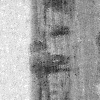

In [27]:
cv2_imshow(x)

In [28]:
with open('s.npy', 'wb') as f:
  np.save(f, solution)